This file shows the distribution of multiple variables in Discrimination and MSM.

In [171]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [179]:
P18_data_path = "../data/P18_Final_Data_07162019.csv"
discrimination_data_path = "../data/discrimination/NYC-RacismNHomophobia.csv"

In [186]:
survey_features_list = ["AI_Total", "AI_Condom", "AI_Condomless", "IAI_Total", "IAI_Condom", "IAI_Condomless", 
                        "RAI_Total", "RAI_Condom", "RAI_Condomless", "drug_use"]
discrimination_features_list = ["SSSOM_Rac (in %)", "SSSOM_Hom (in %)", "normalRacistTweets (in %)", 
                                "Zip_Hom (in %)", "Zip_Rac (in %)"]

In [181]:
df_p18 = pd.read_csv(P18_data_path)
df_p18[:3]

,Unnamed: 0,a_pid,Geo_Zip,subject_visit1,gpsid_visit1,datef1_visit1,agef1_visit1,crossq1a,crossq1b,zipcode,...,Home_Days,Days_All,Hours_All,Seconds_All,Away_Seconds,Away_Hours,Away_Days,Perct_T_Home,Perct_T_Away,Home_Zip_Code_R
0,1,7041,11372.0,7041.0,22723.0,2017-01-30,1990-10-04,83rd st,northern blvd,11370.0,...,8.030521,13.402037,321.648889,1157936.0,464099.0,128.916389,5.371516,0.599202,0.400798,1757.0
1,2,7060,10550.0,7060.0,10156.0,2017-02-23,1991-06-15,2nd Avenue,E 2nd Street,10550.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,7068,10467.0,7068.0,10601.0,2017-01-25,1990-10-08,Holland Avenue,Allerton Avenue,10467.0,...,11.765394,13.905926,333.742222,1201472.0,184942.0,51.372778,2.140532,0.846070,0.153930,2943.0


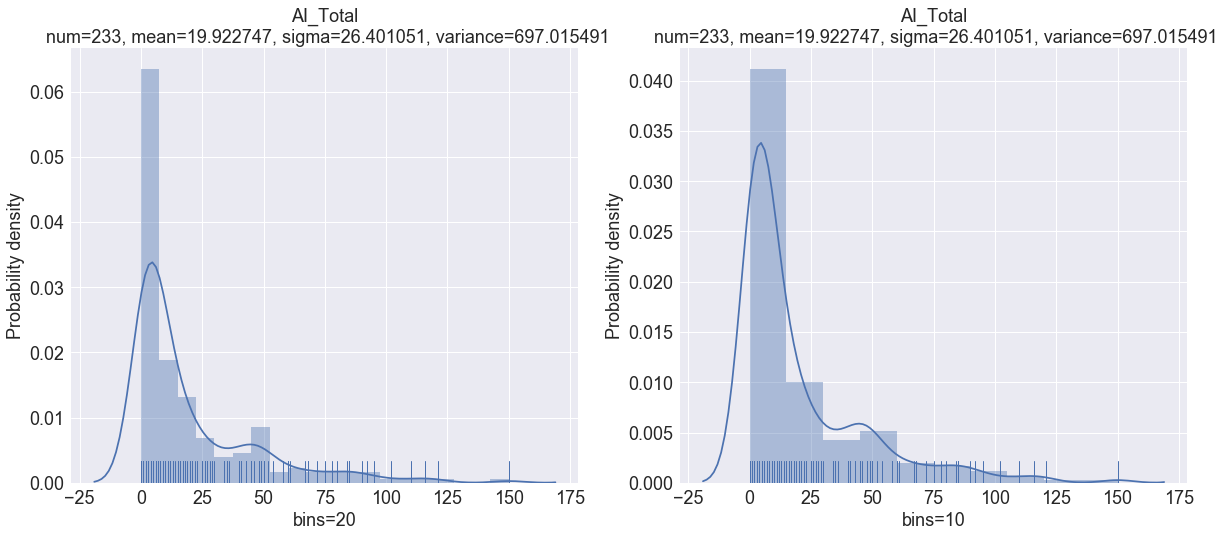

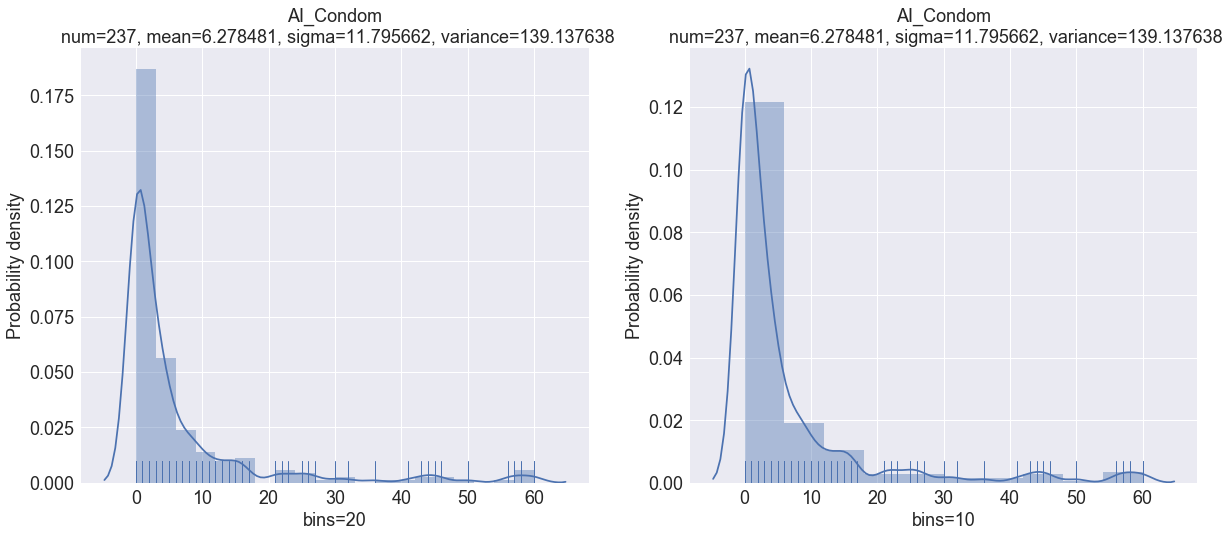

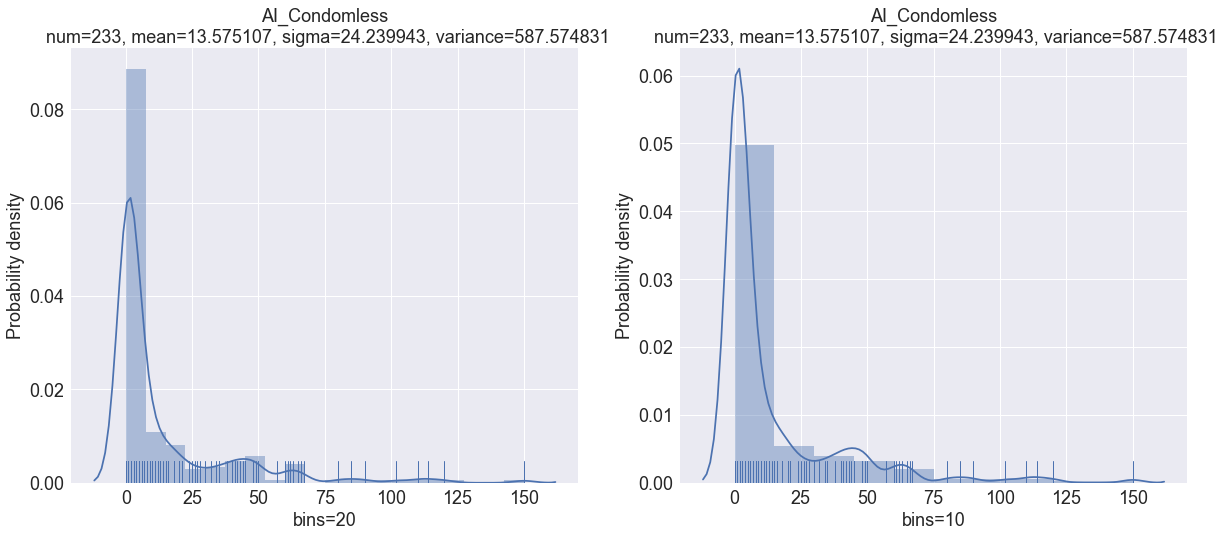

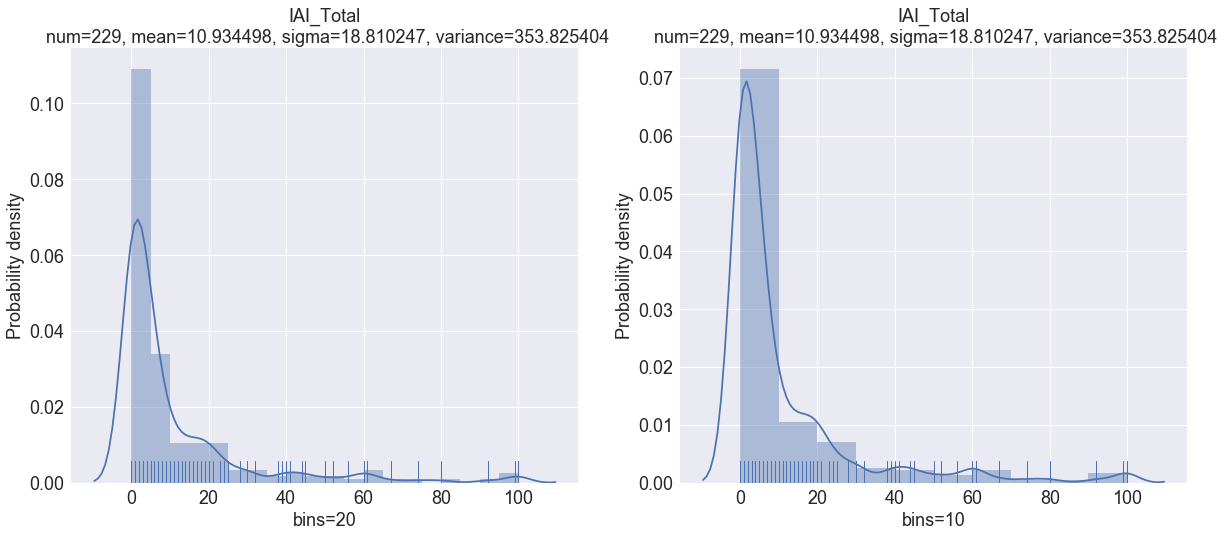

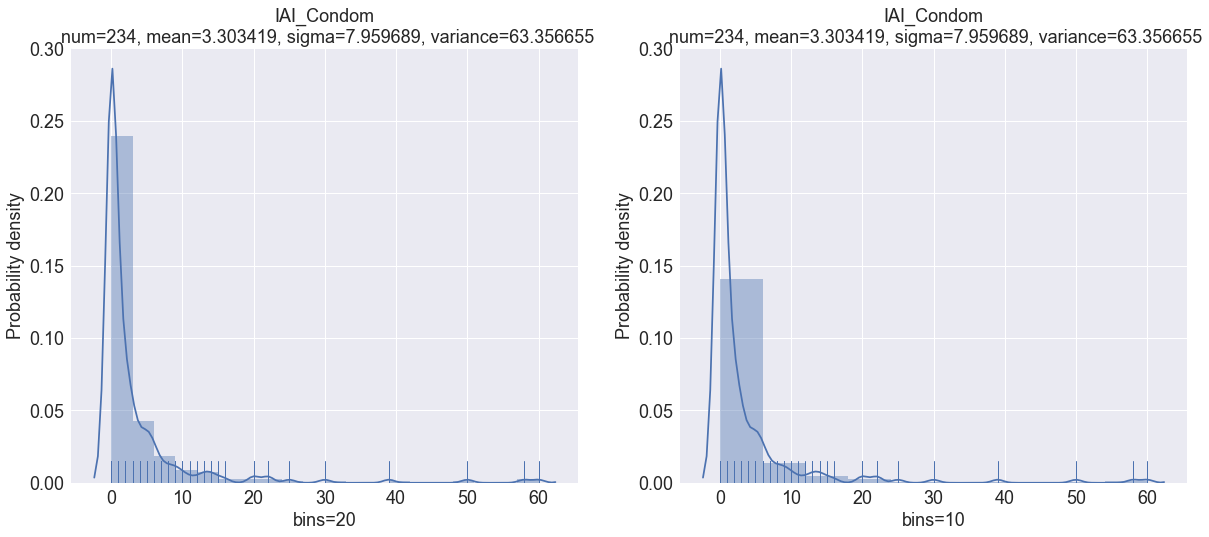

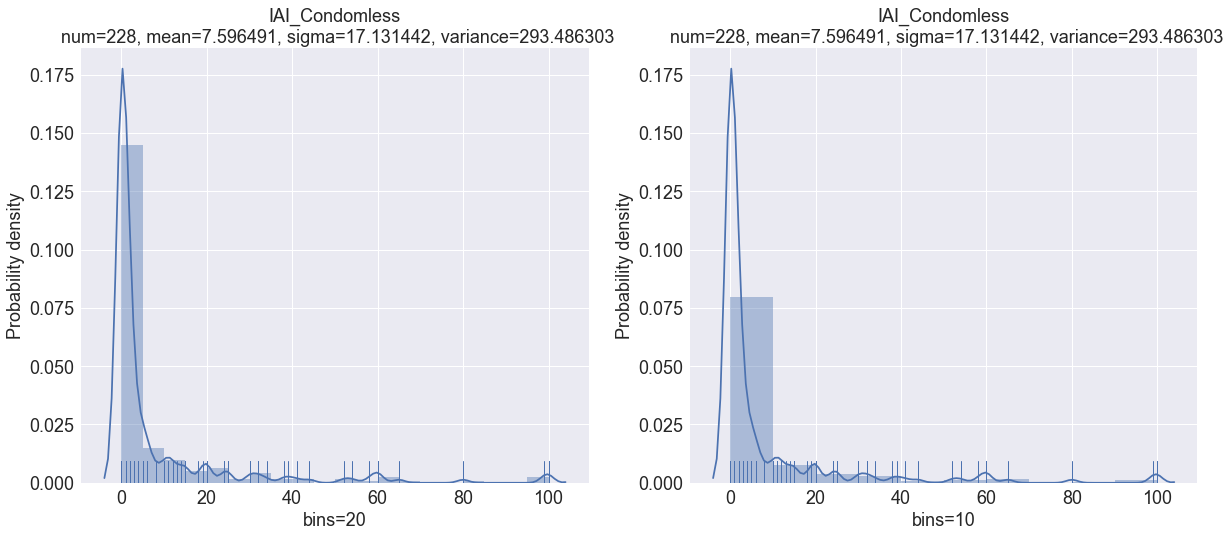

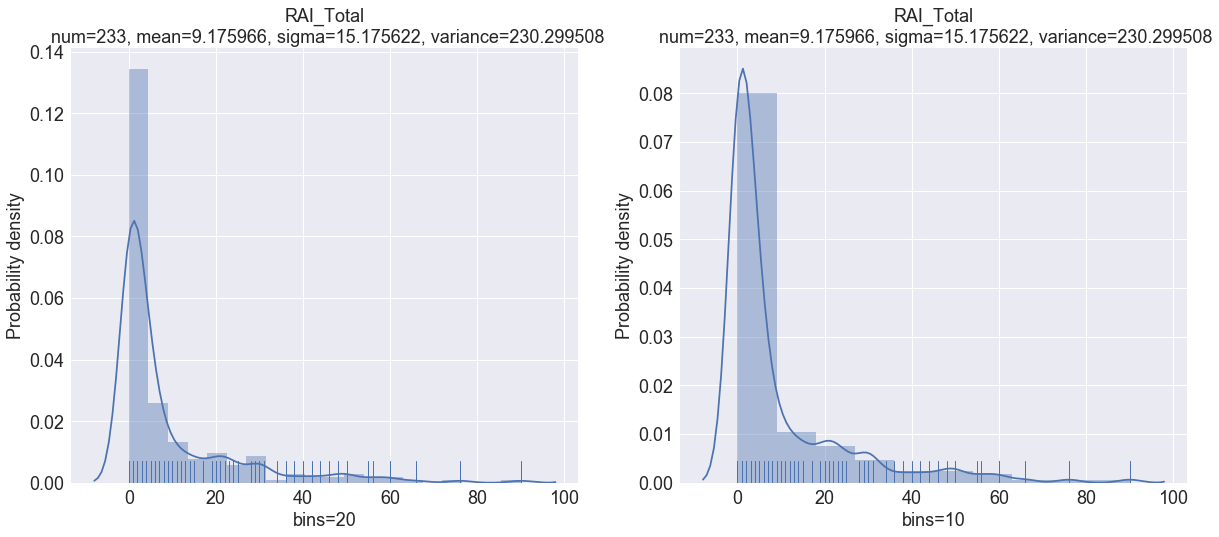

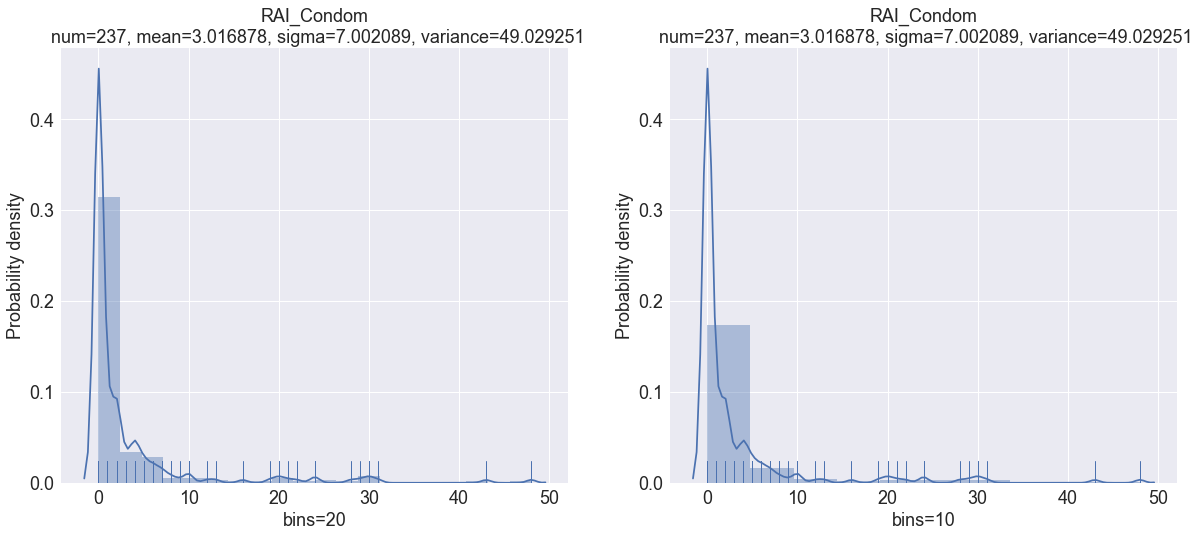

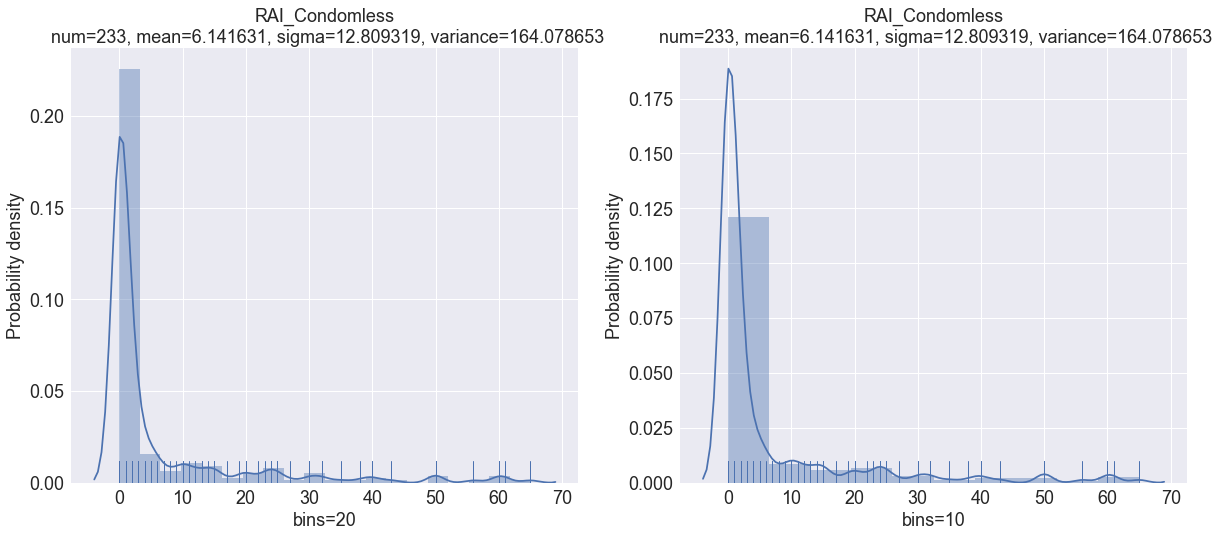

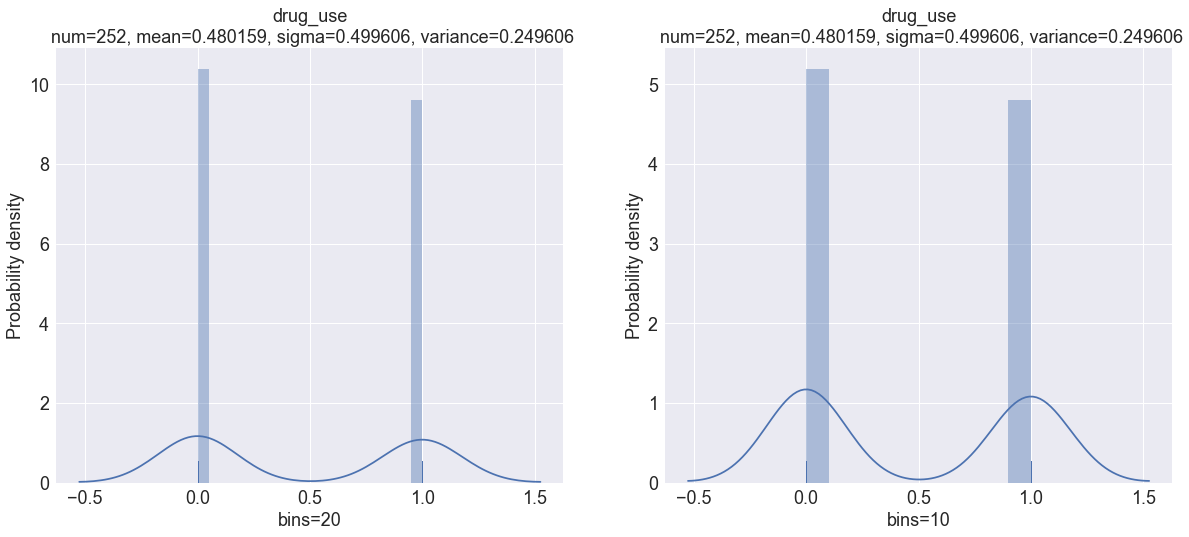

In [176]:
# Draw the figure of survey feature.
for feature in survey_features_list:
    df_feature = df_p18[feature]
    count = 0
    x = []
    for value in df_feature:
        if not np.isnan(value):
            x.append(value)
            count += 1

    mean =np.mean(x)
    sigma =np.std(x)
    variance = np.var(x)
    
#     course initial method using matplot
#     n, bins, patches = plt.hist(x, density=1, facecolor='blue', alpha=0.4) 
#     y = mlab.normpdf(bins, mean, sigma) # fit a line
#     plt.plot(bins, y, 'b--') 
#     plt.xlabel('Value')
#     plt.ylabel('Probability')
#     plt.title("%s: mean= %f, sigma=%f, variance=%f" % (feature, mean, sigma, variance))

#     plt.subplots_adjust(left=0.15)#左边距 
#     plt.show() 

#     Distribution of the variables
#     print("Variable: ", feature)
#     print("Mean: ", mean)
#     print("Standard Error: ", sigma)
#     print("Variance: ", variance)

#     Using seaborn library
    fig,axes=plt.subplots(1,2,figsize=(20,8))
    
    sns.distplot(x, kde=True, bins = 20, rug=True, ax=axes[0])
    axes[0].tick_params(axis='y',labelsize=18)
    axes[0].tick_params(axis='x',labelsize=18)
    axes[0].set_xlabel("bins=20", fontsize=18)
    axes[0].set_title("%s\n num=%d, mean=%f, sigma=%f, variance=%f" % (feature, len(x), mean, sigma, variance), fontsize=18)
    axes[0].set_ylabel("Probability density", fontsize=18)

    sns.distplot(x, kde=True, bins = 10, rug=True, ax=axes[1])
    axes[1].tick_params(axis='y',labelsize=18)
    axes[1].tick_params(axis='x',labelsize=18)
    axes[1].set_xlabel("bins=10", fontsize=18)
    axes[1].set_title("%s\n num=%d, mean=%f, sigma=%f, variance=%f" % (feature, len(x), mean, sigma, variance), fontsize=18)
    axes[1].set_ylabel("Probability density", fontsize=18)

#     break


Now process the discrimination data.

In [180]:
df_discrimination = pd.read_csv(discrimination_data_path)
df_discrimination[:3]

,Grid_ID,Lat,Lon,TotalTweets.x,RacistTweets,NormalRacistTweets (in %),Zip,Zip_Rac (in %),SSSOM_Rac (in %),HomophobicTweets,NormalHomoTweets (in %),Zip_Hom (in %),SSSOM_Hom (in %)
0,1,40.497,-74.247,1,0,0.0,10307.0,0.4636,0.4812,0,0.0,1.9292,1.8332
1,2,40.498,-74.249,1,0,0.0,10307.0,0.4636,0.4812,1,100.0,1.9292,1.8332
2,3,40.498,-74.248,1,0,0.0,10307.0,0.4636,0.4812,0,0.0,1.9292,1.8332


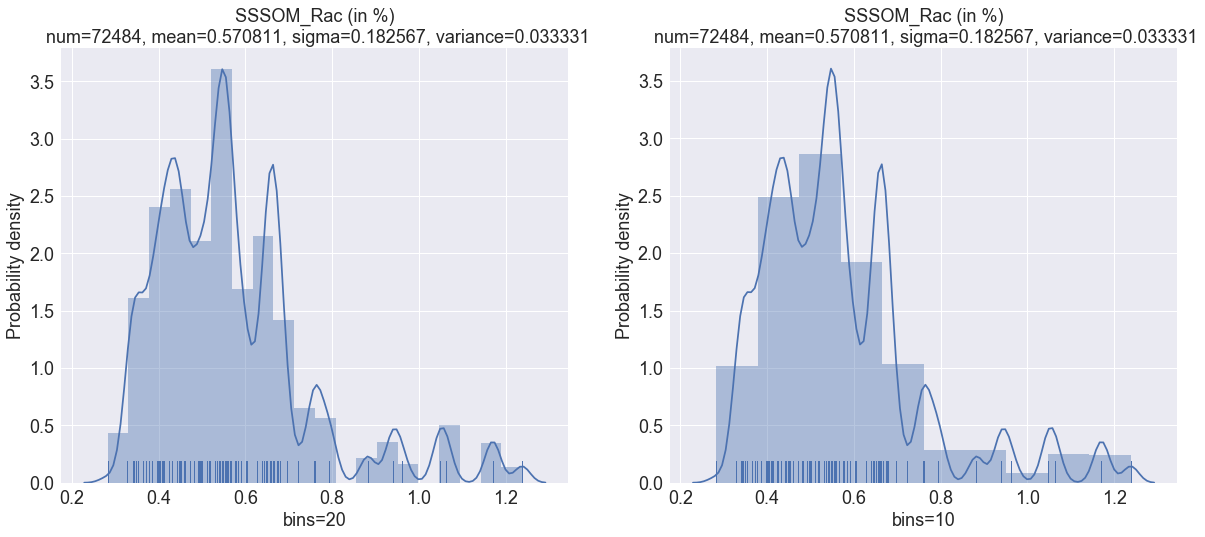

In [188]:
# Draw the figure of discrimination feature.
for feature in discrimination_features_list:
    df_feature = df_discrimination[feature]
    count = 0
    x = []
    for value in df_feature:
        if not np.isnan(value):
            x.append(value)
            count += 1

    mean =np.mean(x)
    sigma =np.std(x)
    variance = np.var(x)

#     Using seaborn library
    fig,axes=plt.subplots(1,2,figsize=(20,8))
    
    sns.distplot(x, kde=True, bins = 20, rug=True, ax=axes[0])
    axes[0].tick_params(axis='y',labelsize=18)
    axes[0].tick_params(axis='x',labelsize=18)
    axes[0].set_xlabel("bins=20", fontsize=18)
    axes[0].set_title("%s\n num=%d, mean=%f, sigma=%f, variance=%f" % (feature, len(x), mean, sigma, variance), fontsize=18)
    axes[0].set_ylabel("Probability density", fontsize=18)

    sns.distplot(x, kde=True, bins = 10, rug=True, ax=axes[1])
    axes[1].tick_params(axis='y',labelsize=18)
    axes[1].tick_params(axis='x',labelsize=18)
    axes[1].set_xlabel("bins=10", fontsize=18)
    axes[1].set_title("%s\n num=%d, mean=%f, sigma=%f, variance=%f" % (feature, len(x), mean, sigma, variance), fontsize=18)
    axes[1].set_ylabel("Probability density", fontsize=18)

    break
